Tabla Diferencia Dividida
[['i   ', 'xi  ', 'fi  ', 'F[1]', 'F[2]', 'F[3]', 'F[4]', 'F[5]', 'F[6]', 'F[7]', 'F[8]', 'F[9]', 'F[10]', 'F[11]', 'F[12]', 'F[13]', 'F[14]', 'F[15]', 'F[16]']]
[[ 0.0000e+00  1.0000e+00  0.0000e+00  2.5000e+01 -2.5000e+01  1.8167e+01
  -8.7500e+00  3.0000e+00 -7.9861e-01  1.7857e-01 -3.5689e-02  6.5476e-03
  -1.0825e-03  1.5302e-04 -1.6885e-05  1.0981e-06  6.2194e-08 -3.4857e-08
   0.0000e+00]
 [ 1.0000e+00  2.0000e+00  2.5000e+01 -2.5000e+01  2.9500e+01 -1.6833e+01
   6.2500e+00 -1.7917e+00  4.5139e-01 -1.0694e-01  2.3239e-02 -4.2769e-03
   6.0075e-04 -4.9603e-05 -2.6096e-06  1.9688e-06 -4.6065e-07  0.0000e+00
   0.0000e+00]
 [ 2.0000e+00  3.0000e+00  0.0000e+00  3.4000e+01 -2.1000e+01  8.1667e+00
  -2.7083e+00  9.1667e-01 -2.9722e-01  7.8968e-02 -1.5253e-02  1.7306e-03
   5.5115e-05 -8.0918e-05  2.2985e-05 -4.4803e-06  0.0000e+00  0.0000e+00
   0.0000e+00]
 [ 3.0000e+00  4.0000e+00  3.4000e+01 -8.0000e+00  3.5000e+00 -2.6667e+00
   1.8750e+00 -8.6667e-01  

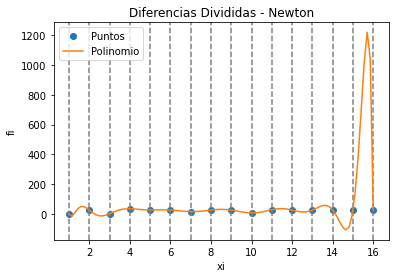

In [1]:
# Polinomio interpolación
# Diferencias Divididas de Newton
# Tarea: Verificar tamaño de vectores,
#        verificar puntos equidistantes en x
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO , Datos de prueba
xi = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
fi = np.array([0,25,0,34,26,25,15,25,25,6,27,25,25,26,26,25])

# PROCEDIMIENTO

# Tabla de Diferencias Divididas Avanzadas
titulo = ['i   ','xi  ','fi  ']
n = len(xi)
ki = np.arange(0,n,1)
tabla = np.concatenate(([ki],[xi],[fi]),axis=0)
tabla = np.transpose(tabla)

# diferencias divididas vacia
dfinita = np.zeros(shape=(n,n),dtype=float)
tabla = np.concatenate((tabla,dfinita), axis=1)

# Calcula tabla, inicia en columna 3
[n,m] = np.shape(tabla)
diagonal = n-1
j = 3
while (j < m):
    # Añade título para cada columna
    titulo.append('F['+str(j-2)+']')

    # cada fila de columna
    i = 0
    paso = j-2 # inicia en 1
    while (i < diagonal):
        denominador = (xi[i+paso]-xi[i])
        numerador = tabla[i+1,j-1]-tabla[i,j-1]
        tabla[i,j] = numerador/denominador
        i = i+1
    diagonal = diagonal - 1
    j = j+1

# POLINOMIO con diferencias Divididas
# caso: puntos equidistantes en eje x
dDividida = tabla[0,3:]
n = len(dfinita)

# expresión del polinomio con Sympy
x = sym.Symbol('x')
polinomio = fi[0]
for j in range(1,n,1):
    factor = dDividida[j-1]
    termino = 1
    for k in range(0,j,1):
        termino = termino*(x-xi[k])
    polinomio = polinomio + termino*factor

# simplifica multiplicando entre (x-xi)
polisimple = polinomio.expand()

# polinomio para evaluacion numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# SALIDA
np.set_printoptions(precision = 4)
print('Tabla Diferencia Dividida')
print([titulo])
print(tabla)
print('dDividida: ')
print(dDividida)
print('polinomio: ')
print(polinomio)
print('polinomio simplificado: ' )
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
for i in range(0,n,1):
    plt.axvline(xi[i],ls='--', color='grey')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Diferencias Divididas - Newton')
plt.show()